In [2]:
#importando os módulos necessários

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
import math
import seaborn as sns


In [3]:
#abrindo os databases
D_HDI = pd.read_excel("Indicator_HDI.xlsx")
D_PVMNT = pd.read_excel("roads paved.xlsx")
D_URB = pd.read_excel("indicator EN_URB_MCTY_TL_ZS.xls.xlsx")







In [4]:
#separando o ano de base
D_HDI_B = D_HDI.loc[:,[ "HDI",1990]]
D_URB_B = D_URB.loc[:,["Population in urban agglomerations of more than 1 million (% of total population)",1990]]
D_PVMNT_B = D_PVMNT.loc[:,["Roads, paved (% of total roads)","1990"]]

#alterando os indices
HDI_IDX = D_HDI_B.set_index("HDI")
URB_IDX = D_URB_B.set_index("Population in urban agglomerations of more than 1 million (% of total population)")
PVMNT_IDX = D_PVMNT_B.set_index("Roads, paved (% of total roads)")

#juntando os datasets
FRST_JOIN = URB_IDX.join(PVMNT_IDX, how='inner',lsuffix='_URB',rsuffix='_PVMNT')
D_JOIN = FRST_JOIN.join(HDI_IDX,how='inner',lsuffix='_URB',rsuffix='_IDH')
D_JOIN.columns=["1990_URB","1990_PVMNT","1990_IDH"]
D_JOIN.to_csv("FINAL.csv")
D_JOIN.head()








,1990_URB,1990_PVMNT,1990_IDH
Afghanistan,7.710820,NaN,0.246
Algeria,7.546848,67.000000,0.551
Angola,14.706588,NaN,NaN
Argentina,39.379239,28.500000,0.697
Armenia,33.134698,99.199997,NaN



# Formulação de Hipotese

 Para conduzir uma analise, é uma boa medida pensar em uma pergunta a ser respondida por ela. Tendo em vista o foco da analise no indice IDH, é preciso verificar a influencia de outras variaveis nesse fator. Para tal, foram escolhidas as variaveis estradas pavimentadas(% do total) e população em nucleos urbanos com mais de 1 milhão de pessoas(% do total). 

## Hipótese:
       
*A porcentagem de estradas pavimentadas e de população em areas urbanas influencia a taxa de crescimento do IDH?*


# Analise Individual

## Ultilizando as ferramentas boxplot e histograma para cada variavel:


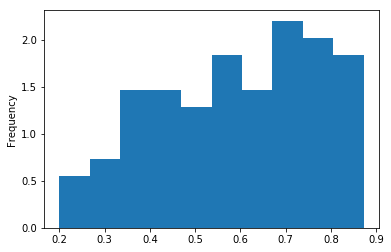

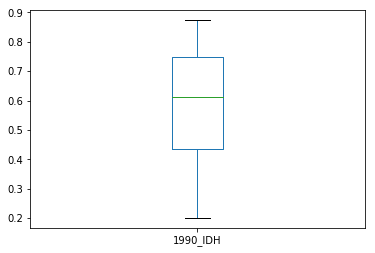

In [5]:

#Plotando os histogramas para o HDI
D_JOIN["1990_IDH"].plot(kind="hist", density=True)
plt.show()
D_JOIN["1990_IDH"].plot.box()
plt.show()










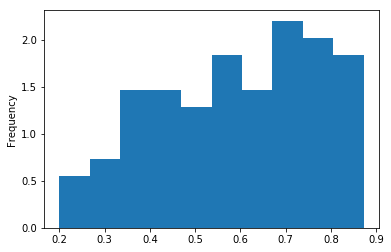

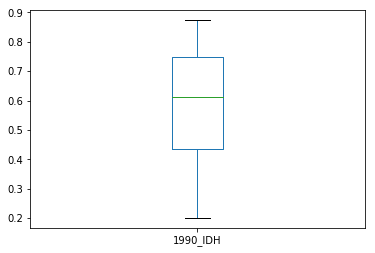

In [6]:
D_JOIN["1990_IDH"].plot(kind="hist", density=True)
plt.show()
D_JOIN["1990_IDH"].plot.box()
plt.show()

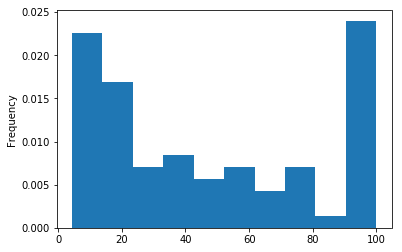

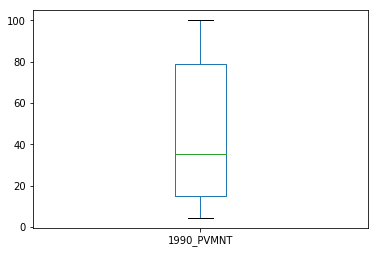

In [7]:
D_JOIN["1990_PVMNT"].plot(kind="hist", density=True)
plt.show()
D_JOIN["1990_PVMNT"].plot.box()
plt.show()

In [8]:
#Verificando as correlações
D_JOIN.corr()



,1990_URB,1990_PVMNT,1990_IDH
1990_URB,1.000000,0.308855,0.527800
1990_PVMNT,0.308855,1.000000,0.631449
1990_IDH,0.527800,0.631449,1.000000


# Analise conjuta

In [9]:
#Verificando as correlações
D_JOIN.corr()


,1990_URB,1990_PVMNT,1990_IDH
1990_URB,1.000000,0.308855,0.527800
1990_PVMNT,0.308855,1.000000,0.631449
1990_IDH,0.527800,0.631449,1.000000


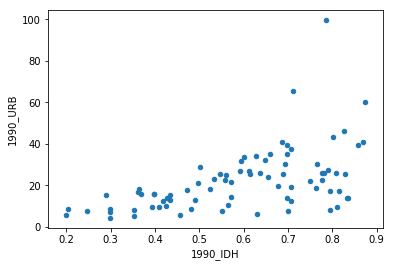

In [14]:
D_JOIN.plot.scatter(x="1990_IDH", y = "1990_URB")

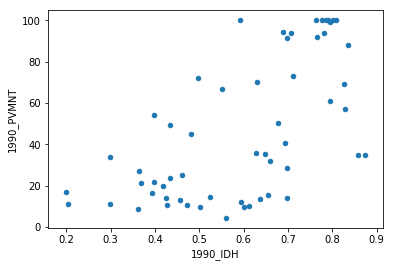

In [15]:
D_JOIN.plot.scatter(x="1990_IDH", y = "1990_PVMNT")